In [1]:
import pandas as pd
import numpy as np


In [2]:
#load dataset
dataset=pd.read_excel('Amazon(iphone 12) review1.xlsx')

In [3]:
dataset

,Serial.no,label,Review,Rating
0,1,neg,A bit disappointed about the colour - it's a b...,3
1,2,pos,I always purchase this item each time I upgrad...,5
2,3,neg,Worst battery performance.Iphone 11 is far bet...,3
3,4,pos,I was on look out for a case that provides mo...,4
4,5,pos,The case fits well; the buttons are easy to ac...,4
5,6,pos,Really happy with the purchase,5
6,7,pos,Great battery life. Love the white colour. Blu...,5
7,8,pos,"Amazing iPhone, worthy update.good display.dec...",5


#EDA:

<AxesSubplot:xlabel='Rating', ylabel='label'>

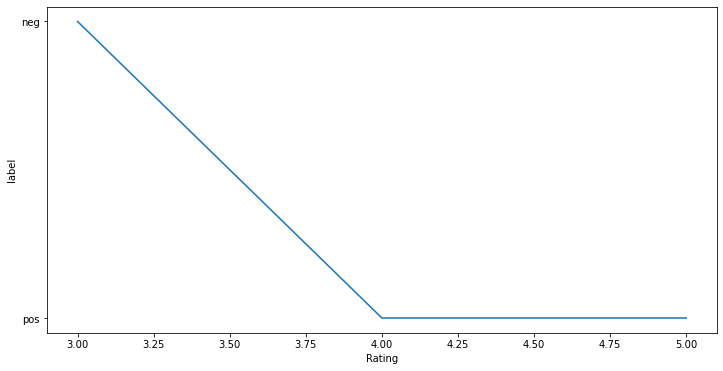

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.lineplot(x='Rating',y='label',data=dataset)

In [25]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Rating', ylabel='Density'>

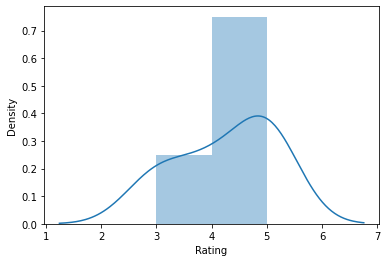

In [26]:
sns.distplot(dataset['Rating'])

<AxesSubplot:>

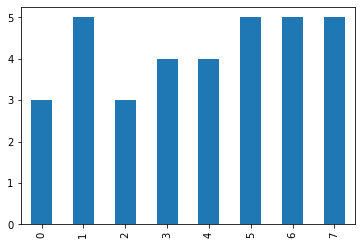

In [27]:
dataset['Rating'].plot.bar()

<AxesSubplot:xlabel='Rating', ylabel='label'>

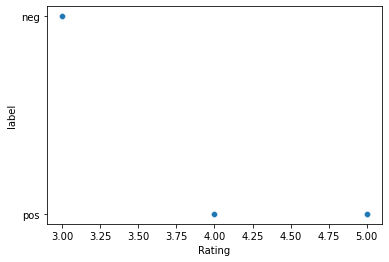

In [29]:
sns.scatterplot(x='Rating',y='label',data=dataset)

<AxesSubplot:>

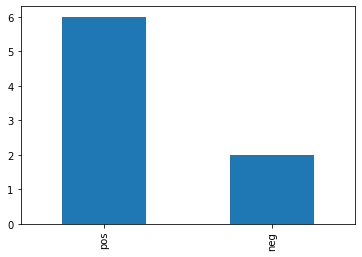

In [32]:
dataset['label'].value_counts().plot(kind='bar')

In [5]:
iphone_review=dataset['Review']
iphone_review

0    A bit disappointed about the colour - it's a b...
1    I always purchase this item each time I upgrad...
2    Worst battery performance.Iphone 11 is far bet...
3     I was on look out for a case that provides mo...
4    The case fits well; the buttons are easy to ac...
5                       Really happy with the purchase
6    Great battery life. Love the white colour. Blu...
7    Amazing iPhone, worthy update.good display.dec...
Name: Review, dtype: object

In [6]:
import nltk

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
sid=SentimentIntensityAnalyzer()

In [10]:
sid.polarity_scores(dataset.loc[0]['Review'])

{'neg': 0.093, 'neu': 0.907, 'pos': 0.0, 'compound': -0.2617}

In [11]:
dataset['scores']=dataset['Review'].apply(lambda Review:sid.polarity_scores(Review))

In [12]:
dataset

,Serial.no,label,Review,Rating,scores
0,1,neg,A bit disappointed about the colour - it's a b...,3,"{'neg': 0.093, 'neu': 0.907, 'pos': 0.0, 'comp..."
1,2,pos,I always purchase this item each time I upgrad...,5,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
2,3,neg,Worst battery performance.Iphone 11 is far bet...,3,"{'neg': 0.123, 'neu': 0.721, 'pos': 0.156, 'co..."
3,4,pos,I was on look out for a case that provides mo...,4,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp..."
4,5,pos,The case fits well; the buttons are easy to ac...,4,"{'neg': 0.096, 'neu': 0.684, 'pos': 0.22, 'com..."
5,6,pos,Really happy with the purchase,5,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound..."
6,7,pos,Great battery life. Love the white colour. Blu...,5,"{'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'comp..."
7,8,pos,"Amazing iPhone, worthy update.good display.dec...",5,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp..."


In [13]:
dataset['compound']=dataset['scores'].apply(lambda scores:scores['compound'])

In [14]:
dataset

,Serial.no,label,Review,Rating,scores,compound
0,1,neg,A bit disappointed about the colour - it's a b...,3,"{'neg': 0.093, 'neu': 0.907, 'pos': 0.0, 'comp...",-0.2617
1,2,pos,I always purchase this item each time I upgrad...,5,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.5859
2,3,neg,Worst battery performance.Iphone 11 is far bet...,3,"{'neg': 0.123, 'neu': 0.721, 'pos': 0.156, 'co...",0.0258
3,4,pos,I was on look out for a case that provides mo...,4,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.7269
4,5,pos,The case fits well; the buttons are easy to ac...,4,"{'neg': 0.096, 'neu': 0.684, 'pos': 0.22, 'com...",0.5499
5,6,pos,Really happy with the purchase,5,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.6115
6,7,pos,Great battery life. Love the white colour. Blu...,5,"{'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'comp...",0.9217
7,8,pos,"Amazing iPhone, worthy update.good display.dec...",5,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp...",0.7717


In [15]:
dataset['scores'][0]['compound']

-0.2617

In [16]:
dataset['comp_score']=dataset['compound'].apply(lambda compound:'pos' if compound>=0 else 'neg')

In [17]:
dataset

,Serial.no,label,Review,Rating,scores,compound,comp_score
0,1,neg,A bit disappointed about the colour - it's a b...,3,"{'neg': 0.093, 'neu': 0.907, 'pos': 0.0, 'comp...",-0.2617,neg
1,2,pos,I always purchase this item each time I upgrad...,5,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.5859,pos
2,3,neg,Worst battery performance.Iphone 11 is far bet...,3,"{'neg': 0.123, 'neu': 0.721, 'pos': 0.156, 'co...",0.0258,pos
3,4,pos,I was on look out for a case that provides mo...,4,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.7269,pos
4,5,pos,The case fits well; the buttons are easy to ac...,4,"{'neg': 0.096, 'neu': 0.684, 'pos': 0.22, 'com...",0.5499,pos
5,6,pos,Really happy with the purchase,5,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.6115,pos
6,7,pos,Great battery life. Love the white colour. Blu...,5,"{'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'comp...",0.9217,pos
7,8,pos,"Amazing iPhone, worthy update.good display.dec...",5,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp...",0.7717,pos


In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
accuracy_score(dataset['label'],dataset['comp_score'])

0.875

In [20]:
print(classification_report(dataset['label'],dataset['comp_score']))

              precision    recall  f1-score   support

         neg       1.00      0.50      0.67         2
         pos       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



In [21]:
print(confusion_matrix(dataset['label'],dataset['comp_score']))

[[1 1]
 [0 6]]
